# Face Mask Detection using CNN

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery. CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps. Counter-intuitively, most convolutional neural networks are not invariant to translation, due to the downsampling operation they apply to the input.They have applications in image and video recognition, recommender systems,image classification, image segmentation, medical image analysis, natural language processing, brain–computer interfaces, and financial time series.<a href="https://en.wikipedia.org/wiki/Convolutional_neural_network" class="button">Click here for more info</a>

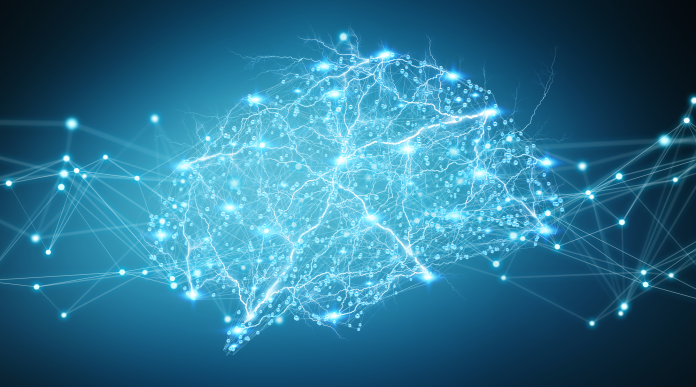

### Let us prepare our kaggle environment
We do this by installing `kaggle` into out notebook. Then we use an api key on your kaggle profile to download the dataset.

In [1]:
!pip install kaggle

     |████████████████████████████████| 58 kB 4.6 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 6.8 MB/s             
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=3ad8b7d715af4a6191d6362dd01b421db509d6beb116644513897d686ea73c7a
  Stored in directory: /home/jovyan/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/home/jovyan/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.9/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.9/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/jovyan/.kaggle. Or use the environment method.


Next we unzip the dataset and create a directory for it.

In [4]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("Dataset Exctracted successfully")

Dataset Exctracted successfully


We have successfully loaded the dataset. Now we will also load our necessary libraries that we're going to use in future.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Lets look the first five images in both datasets and last five images in both dataset.

In [6]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_2427.jpg', 'with_mask_1413.jpg', 'with_mask_3295.jpg', 'with_mask_267.jpg', 'with_mask_3163.jpg']
['with_mask_2714.jpg', 'with_mask_1294.jpg', 'with_mask_2247.jpg', 'with_mask_2733.jpg', 'with_mask_3570.jpg']


In [7]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_1619.jpg', 'without_mask_3222.jpg', 'without_mask_488.jpg', 'without_mask_2020.jpg', 'without_mask_1020.jpg']
['without_mask_3091.jpg', 'without_mask_413.jpg', 'without_mask_2321.jpg', 'without_mask_1117.jpg', 'without_mask_2789.jpg']


In [8]:
print("Number of images with masks: ", len(with_mask_file))
print("Number of images without masks ", len(without_mask_file))

Number of images with masks:  3725
Number of images without masks  3828


**Creating Labels for the two class image**

We create labels for our dataset, as you may have observed that this is a classification problem. We need the model to know whether the person in the picture is wearing a mask or not.

with mask->1

without mask ->0

In [9]:
with_mask_labels = [1]*len(with_mask_file)
without_mask_labels = [0]*len(without_mask_file)

In [10]:
print("With masks labels: ",with_mask_labels[0:5])
print("Without masks labels: ",without_mask_labels[0:5])

With masks labels:  [1, 1, 1, 1, 1]
Without masks labels:  [0, 0, 0, 0, 0]


In [11]:
print("Length of masked labels: ", len(with_mask_labels))
print("Length of unmasked labels: ", len(without_mask_labels))

Length of masked labels:  3725
Length of unmasked labels:  3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


In [4]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='https://jovian.com/mohlapokt/project-face-mask-detection', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "mohlapokt/"
[jovian] Committed successfully! https://jovian.com/mohlapokt/project-face-mask-detection-fada1


'https://jovian.com/mohlapokt/project-face-mask-detection-fada1'

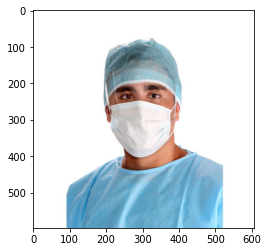

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_2443.jpg')
imgplot = plt.imshow(img)
plt.show()

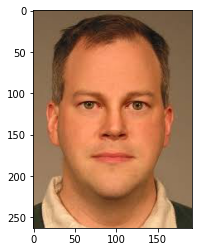

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_2383.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the image
2. Convert the images to numpy arrays

In [15]:
with_mask_path = "/content/data/with_mask/"
data = []

for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

**Train Test Split**

In [17]:
X = np.array(data)
Y = np.array(labels)

In [18]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [20]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape)

(7553, 128, 128, 3) (7553,) (6042, 128, 128, 3) (6042,)


In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building a CNN Model**

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3),  activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),  activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [25]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 13s 20ms/step - loss: 0.4526 - acc: 0.7907 - val_loss: 0.2799 - val_acc: 0.8810
Epoch 2/10
170/170 [==============================] - 2s 14ms/step - loss: 0.2850 - acc: 0.8836 - val_loss: 0.2309 - val_acc: 0.9074
Epoch 3/10
170/170 [==============================] - 3s 16ms/step - loss: 0.2517 - acc: 0.9018 - val_loss: 0.2345 - val_acc: 0.9074
Epoch 4/10
170/170 [==============================] - 2s 14ms/step - loss: 0.2027 - acc: 0.9185 - val_loss: 0.2651 - val_acc: 0.9058
Epoch 5/10
170/170 [==============================] - 2s 14ms/step - loss: 0.1780 - acc: 0.9279 - val_loss: 0.2643 - val_acc: 0.9140
Epoch 6/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1547 - acc: 0.9388 - val_loss: 0.2160 - val_acc: 0.9223
Epoch 7/10
170/170 [==============================] - 3s 15ms/step - loss: 0.1182 - acc: 0.9524 - val_loss: 0.2940 - val_acc: 0.9223
Epoch 8/10
170/170 [==============================] - 2s 14ms/step -

**Model Accuracy**

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy: ', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2498 - acc: 0.9292
Test Accuracy:  0.9291859865188599


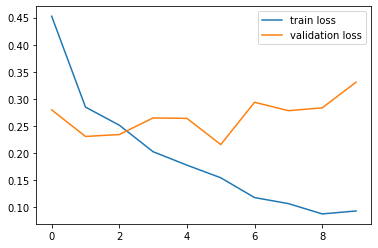

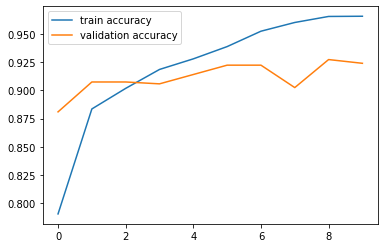

In [27]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictions**

Path of the image to be predicted: /content/data/with_mask/with_mask_3143.jpg


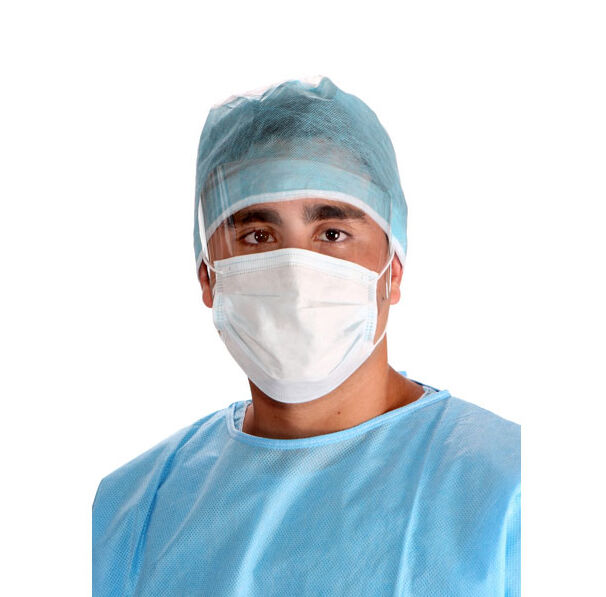

1/1 [==============================] - 0s 155ms/step
[[0.09350999 0.95684856]]
1
The person in the image is wearing a mask


In [29]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
